Link Dataset

https://www.kaggle.com/datasets/imsparsh/dockship-boat-type-classification

# Import Library Yang Dibutuhkan

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import os

memanggil direktori kereta

In [2]:
Train_dir = "Datakapal/Train"

# Image Data Generator

membuat datagen untuk mendeklarasikan ImageDataGenerator membuat data flow from directory untuk train data

In [3]:
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 0.45,
    width_shift_range = 0.25,
    height_shift_range= 0.25,
    shear_range = 0.2,
    zoom_range = 0.25,
    horizontal_flip = True,
    fill_mode = "nearest",
)
train_generator = train_datagen.flow_from_directory(
    Train_dir,
    target_size = (150,150),
    batch_size = 32,
    shuffle = True,
    class_mode = "categorical"
)

Found 1162 images belonging to 9 classes.


membuat datagen untuk mendeklarasikan ImageDataGenerator dan membuat data flow from directory untuk Val data

In [4]:
val_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)

val_generator = train_datagen.flow_from_directory(
    Train_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical',
    subset='validation'
)

Found 0 images belonging to 9 classes.


## Membuat model Sequential

Model Sequential dengan Convolutional Layer dan Compile model menggunakan optimizer Adam, loss function
Categorical_crossentropy

In [5]:
model = tf.keras.Sequential([
    Conv2D(16,3,activation = "relu",input_shape=[150,150,3]),
    MaxPooling2D(2,2),
    Conv2D(32 , 3, activation = "relu"),
    MaxPooling2D(2,2),
    Conv2D(64 , 3, activation = "relu"),
    MaxPooling2D(2,2),
    Conv2D(128 , 3, activation = "relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation = "relu"),
    Dense(9, activation = "softmax")
])

model.compile(
    optimizer = "Adam",
    loss = "categorical_crossentropy",
    metrics = ["acc"]
)

Latih model dengan masukan data generator sebagai inputan data dan atur
epoch sampai510 kali

In [6]:
hasil = model.fit(train_generator,validation_data=val_generator,epochs=50,verbose=1)

Epoch 1/50
37/37 [==============================] - 38s 985ms/step - loss: 1.8906 - acc: 0.2900
Epoch 2/50
37/37 [==============================] - 39s 1s/step - loss: 1.7780 - acc: 0.3365
Epoch 3/50
37/37 [==============================] - 36s 977ms/step - loss: 1.7330 - acc: 0.3571
Epoch 4/50
37/37 [==============================] - 38s 1s/step - loss: 1.6597 - acc: 0.3873
Epoch 5/50
37/37 [==============================] - 36s 979ms/step - loss: 1.6379 - acc: 0.4010
Epoch 6/50
37/37 [==============================] - 37s 1s/step - loss: 1.5841 - acc: 0.4269
Epoch 7/50
37/37 [==============================] - 43s 1s/step - loss: 1.5764 - acc: 0.4441
Epoch 8/50
37/37 [==============================] - 40s 1s/step - loss: 1.5711 - acc: 0.4380
Epoch 9/50
37/37 [==============================] - 36s 977ms/step - loss: 1.5035 - acc: 0.4776
Epoch 10/50
37/37 [==============================] - 39s 1s/step - loss: 1.4338 - acc: 0.5146
Epoch 11/50
37/37 [==============================] - 41s 

melakukan evaluasi pada model

In [7]:
model.evaluate(train_generator)

37/37 [==============================] - 33s 839ms/step - loss: 0.6519 - acc: 0.7788


[0.6518864631652832, 0.7788295745849609]

menyimpan history akurasi dan loss

In [14]:
accuracy = hasil.history['acc']

In [15]:
loss = hasil.history['loss']

Menampilkan grafik dari accuracy dan loss dengan membandingkan jumlah epochs yaitu 50 epochs

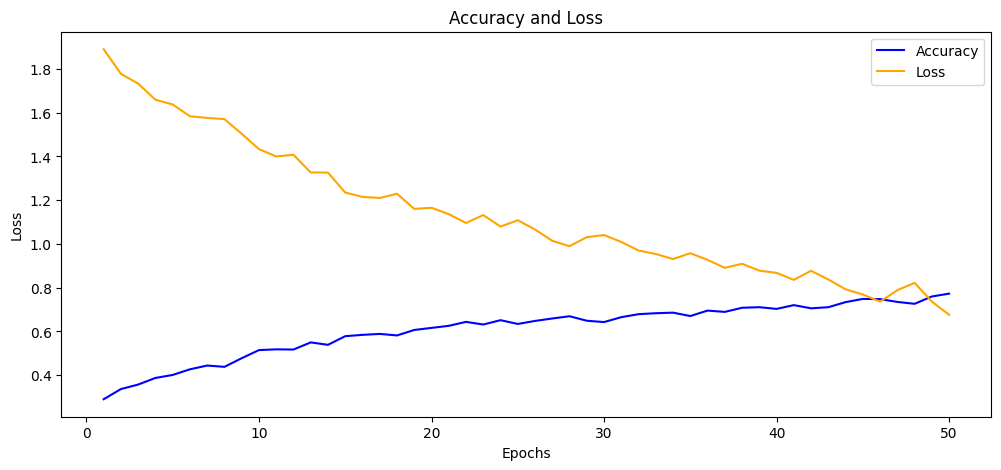

In [16]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Accuracy', color='blue')
plt.plot(range(1, len(loss) + 1), loss, label='Loss',  color='orange')
plt.title('Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()